In [13]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import cv2
import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [58]:
import cv2

img = cv2.imread('./img/surya/s1.jpg')
print(img.shape)

(420, 630, 3)


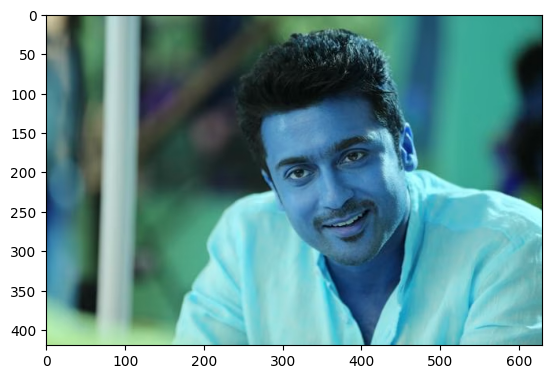

In [59]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img)

In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(420, 630)

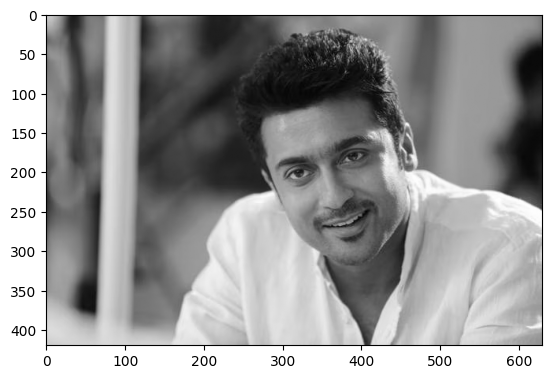

In [61]:
plt.imshow(gray, cmap='gray')

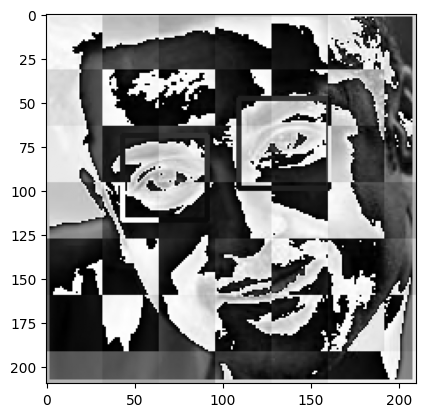

In [62]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

(x,y,w,h) = faces[0]

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
# plt.imshow(face_img)
# plt.show()


for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# plt.figure()
# plt.imshow(face_img, cmap='gray')
# plt.show()


# prepocessing crop the facial part
# plt.imshow(roi_color, cmap='gray')
# plt.show()
import numpy as np
cropped_img = np.array(roi_color)

# 3. prepocessing - Use wavelet transform as a feature for traning our model

import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    # convert to grayscale
    if len(imArray.shape) == 3:
        imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)  
    coeffs_H[0] *= 0  
    imArray_H = pywt.waverec2(coeffs_H, mode)  
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

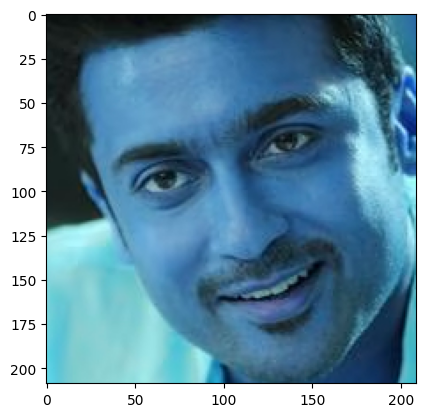

In [63]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

original_image = cv2.imread('./img/surya/s2.jpg')
plt.imshow(original_image)

cropped_image = get_cropped_image_if_2_eyes('./img/surya/s1.jpg')
plt.imshow(cropped_image)

In [64]:
path_to_data = './img/'
path_to_cr_data = './img/cropped/'

In [65]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [66]:
img_dirs

['./img/cropped',
 './img/mammootty',
 './img/mohanlal',
 './img/nivinpauly',
 './img/rajinikanth',
 './img/surya',
 './img/vijay']

Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [67]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [68]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        if entry.is_file():
            image_path = entry.path
            cropped_image = get_cropped_image_if_2_eyes(image_path)
            if cropped_image is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.mkdir(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                cropped_file_name = celebrity_name + str(count) + '.jpg'
                cropped_file_path = cropped_folder + '/' + cropped_file_name
                cv2.imwrite(cropped_file_path, cropped_image)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Now you should have cropped folder under datasets folder that contains cropped images
Manually examine cropped folder and delete any unwanted images

In [69]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'mammootty': ['./img/cropped/mammootty\\mammootty1.jpg',
  './img/cropped/mammootty\\mammootty10.jpg',
  './img/cropped/mammootty\\mammootty11.jpg',
  './img/cropped/mammootty\\mammootty12.jpg',
  './img/cropped/mammootty\\mammootty14.jpg',
  './img/cropped/mammootty\\mammootty15.jpg',
  './img/cropped/mammootty\\mammootty16.jpg',
  './img/cropped/mammootty\\mammootty17.jpg',
  './img/cropped/mammootty\\mammootty18.jpg',
  './img/cropped/mammootty\\mammootty19.jpg',
  './img/cropped/mammootty\\mammootty2.jpg',
  './img/cropped/mammootty\\mammootty20.jpg',
  './img/cropped/mammootty\\mammootty21.jpg',
  './img/cropped/mammootty\\mammootty22.jpg',
  './img/cropped/mammootty\\mammootty23.jpg',
  './img/cropped/mammootty\\mammootty24.jpg',
  './img/cropped/mammootty\\mammootty25.jpg',
  './img/cropped/mammootty\\mammootty26.jpg',
  './img/cropped/mammootty\\mammootty27.jpg',
  './img/cropped/mammootty\\mammootty28.jpg',
  './img/cropped/mammootty\\mammootty29.jpg',
  './img/cropped/mammoo

In [70]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'mammootty': 0,
 'mohanlal': 1,
 'nivinpauly': 2,
 'rajinikanth': 3,
 'surya': 4,
 'vijay': 5}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [71]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [72]:
len(X)

278

In [73]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(278, 4096)

Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [74]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6428571428571429

In [79]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.67      0.40      0.50        10
           2       0.64      0.75      0.69        12
           3       1.00      0.22      0.36         9
           4       0.61      0.73      0.67        15
           5       0.59      0.87      0.70        15

    accuracy                           0.64        70
   macro avg       0.71      0.61      0.61        70
weighted avg       0.69      0.64      0.62        70




Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [80]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [81]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [82]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\dilji\Documents\AI Engineer\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\dilji\Documents\AI Engineer\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dilji\Documents\AI Engineer\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,model,best_score,best_params
0,svm,0.561789,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.359930,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.629384,{'logisticregression__C': 5}


In [83]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [84]:

best_estimators['svm'].score(X_test,y_test)

0.7

In [85]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7428571428571429

In [86]:
best_clf = best_estimators['svm']

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  1,  0,  0,  0,  1],
       [ 2,  7,  0,  1,  0,  0],
       [ 0,  0,  9,  0,  2,  1],
       [ 1,  1,  2,  3,  0,  2],
       [ 0,  0,  2,  1, 10,  2],
       [ 0,  1,  1,  0,  0, 13]])

Text(95.72222222222221, 0.5, 'Truth')

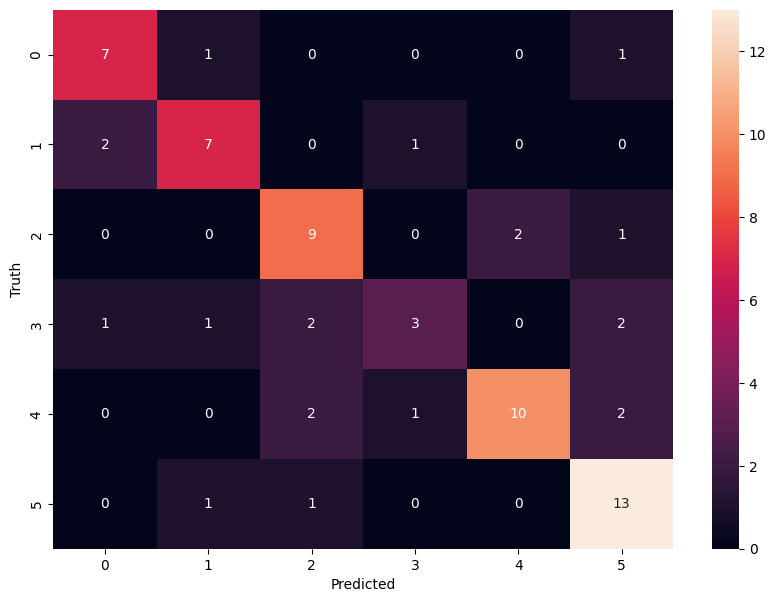

In [88]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [89]:
class_dict

{'mammootty': 0,
 'mohanlal': 1,
 'nivinpauly': 2,
 'rajinikanth': 3,
 'surya': 4,
 'vijay': 5}

In [90]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [91]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))